##Tirmzi Analysis
n=1000 m+=1000 nm-=120 istep= 4 min=150 max=700

In [1]:
import sys
sys.path
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal

In [2]:
ls

 Volume in drive C is Local Disk
 Volume Serial Number is AA1B-997A

 Directory of C:\Users\emaro\OneDrive - University of Mount Union\XSEDE Summer 2021\xsede-spm\data

08/03/2021  01:20 PM    <DIR>          .
08/03/2021  01:20 PM    <DIR>          ..
08/03/2021  01:20 PM    <DIR>          .ipynb_checkpoints
08/02/2021  02:01 PM    <DIR>          0309-VariedNuni_8_2_2021-0000
08/02/2021  02:15 PM    <DIR>          8_2_2021
08/02/2021  02:18 PM           152,527 8_2_2021_FortranVariedNuni.ipynb
08/02/2021  03:39 PM           161,361 8_2_2021_FortranVariedNuni-Copy1.ipynb
08/03/2021  01:17 PM           130,779 8_2_2021_PythonVariedNuni.ipynb
08/02/2021  02:58 PM           130,726 8_2_2021_PythonVariedNuni-Copy1.ipynb
08/03/2021  01:20 PM           148,540 8_2_2021_PythonVariedNuni-Copy2.ipynb
08/03/2021  01:20 PM           130,779 8_2_2021_PythonVariedNuni-Copy3.ipynb
08/03/2021  01:20 PM           148,540 8_2_2021_PythonVariedNuni-Copy4.ipynb
08/02/2021  02:52 PM    <DIR>          8_2_2

In [3]:
import capsol.newanalyzecapsol as ac

In [4]:
ac.get_gridparameters

<function capsol.newanalyzecapsol.get_gridparameters(f_name)>

In [5]:
import glob

In [6]:
folders = glob.glob("m_minus_F/*/")
folders


['m_minus_F\\0327-m_minus4-0002\\',
 'm_minus_F\\0329-m_minus4-0000\\',
 'm_minus_F\\0331-m_minus4-0001\\']

In [7]:
all_data= dict() 
for folder in folders:
    params = ac.get_gridparameters(folder + 'capsol.in')
    data = ac.np.loadtxt(folder + 'Z-U.dat')
    process_data = ac.process_data(params, data, smoothing=False, std=5*10**-9, fortran=True)
    all_data[folder]= (process_data)
all_params= dict()
for folder in folders:
    params=ac.get_gridparameters(folder + 'capsol.in')
    all_params[folder]= (params)

In [8]:
all_data

{'m_minus_F\\0327-m_minus4-0002\\': {'z': array([150.    , 152.0001, 153.9999, 156.    , 158.0001, 159.9999,
         162.    , 164.0001, 165.9999, 168.    , 170.0001, 171.9999,
         174.    , 176.0001, 177.9999, 180.    , 182.0001, 183.9999,
         186.    , 188.0001, 189.9999, 192.    , 194.0001, 195.9999,
         198.    , 200.0001, 201.9999, 204.    , 206.0001, 207.9999,
         210.    , 212.0001, 213.9999, 216.    , 218.0001, 219.9999,
         222.    , 224.0001, 225.9999, 228.    , 230.0001, 231.9999,
         234.    , 236.0001, 237.9999, 240.    , 242.0001, 243.9999,
         246.    , 248.0001, 249.9999]),
  'c': array([1.70827801e-15, 4.47207700e+04, 1.70788405e-15, 4.36308247e+04,
         4.48505000e+04, 4.55673080e+04, 4.60517344e+04, 4.40055075e+04,
         3.67598359e+04, 4.13465670e+04, 4.46341879e+04, 4.41580378e+04,
         4.38103626e+04, 4.31578497e+04, 4.35445572e+04, 4.31573265e+04,
         4.25640669e+04, 4.36801294e+04, 1.70481938e-15, 4.21327962e+0

In [9]:
all_data.keys()

dict_keys(['m_minus_F\\0327-m_minus4-0002\\', 'm_minus_F\\0329-m_minus4-0000\\', 'm_minus_F\\0331-m_minus4-0001\\'])

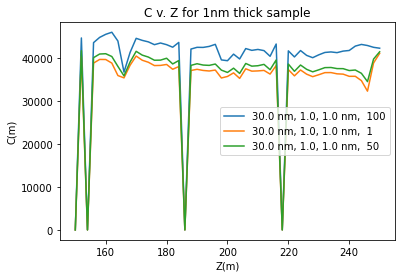

In [10]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness =all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    Nuni=all_params[key]['Nuni']
    plt.plot(data['z'], data['c'], label= f'{rtip} nm, {er}, {thickness} nm,  {Nuni}')
    
    
plt.title('C v. Z for 1nm thick sample')    
plt.ylabel("C(m)")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("C' v. Z for 1nm thick sample 06-28-2021.png")

cut off last experiment because capacitance was off the scale

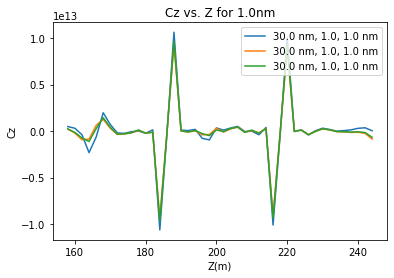

In [11]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(4,-3)
    plt.plot(data['z'][s], data['cz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Cz vs. Z for 1.0nm')    
plt.ylabel("Cz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Cz v. Z for varying sample thickness, 06-28-2021.png")

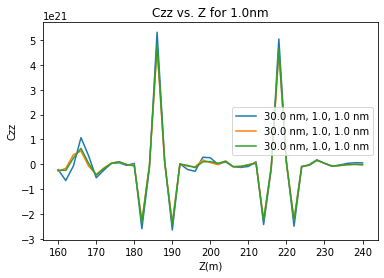

In [12]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(5,-5)
    plt.plot(data['z'][s], data['czz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Czz vs. Z for 1.0nm')    
plt.ylabel("Czz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Czz v. Z for varying sample thickness, 06-28-2021.png")

In [13]:
params

{'n': 1000,
 'm+': 1000,
 'm-': 4,
 'h0': 0.5,
 'rho_max': 1000000.0,
 'z_max': 1000000.0,
 'min': 150.0,
 'max': 250.0,
 'istep': 4.0,
 'Rtip': 30.0,
 'half-angle': 20.0,
 'HCone': 15000.0,
 'RCantilever': 13750.0,
 'thickness_Cantilever': 999.99,
 'eps_r': 1.0,
 'Thickness_sample': 1.0,
 'Solving Method': 'LAPACK',
 'Test': 0,
 'Verbosity': 0,
 'Nuni': 50,
 'Equally spaced': False}

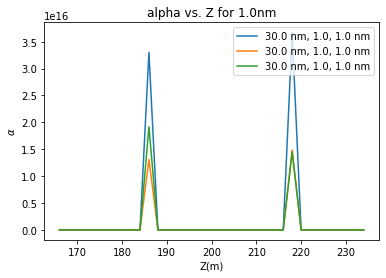

In [14]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(8,-8)
    plt.plot(data['z'][s], data['alpha'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('alpha vs. Z for 1.0nm')    
plt.ylabel("$\\alpha$")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Alpha v. Z for varying sample thickness, 06-28-2021.png")

In [15]:
data

{'z': array([150.    , 152.0001, 153.9999, 156.    , 158.0001, 159.9999,
        162.    , 164.0001, 165.9999, 168.    , 170.0001, 171.9999,
        174.    , 176.0001, 177.9999, 180.    , 182.0001, 183.9999,
        186.    , 188.0001, 189.9999, 192.    , 194.0001, 195.9999,
        198.    , 200.0001, 201.9999, 204.    , 206.0001, 207.9999,
        210.    , 212.0001, 213.9999, 216.    , 218.0001, 219.9999,
        222.    , 224.0001, 225.9999, 228.    , 230.0001, 231.9999,
        234.    , 236.0001, 237.9999, 240.    , 242.0001, 243.9999,
        246.    , 248.0001, 249.9999]),
 'c': array([1.69969791e-15, 4.17478652e+04, 1.69930495e-15, 4.01326637e+04,
        4.09780234e+04, 4.10477484e+04, 4.03983865e+04, 3.80942141e+04,
        3.58868303e+04, 3.91121088e+04, 4.16069942e+04, 4.07209424e+04,
        4.02709337e+04, 3.95308883e+04, 3.95562053e+04, 3.99962947e+04,
        3.86641837e+04, 3.94557652e+04, 1.69624829e-15, 3.83338714e+04,
        3.87162647e+04, 3.84088685e+04, 3.8333

In [16]:
from scipy.optimize import curve_fit


In [17]:
def Cz_model(z, a, n, b,):
    return(a*z**n + b)

In [18]:
all_data.keys()

dict_keys(['m_minus_F\\0327-m_minus4-0002\\', 'm_minus_F\\0329-m_minus4-0000\\', 'm_minus_F\\0331-m_minus4-0001\\'])

In [19]:
data= all_data['capsol-calc\\0001-capsol\\']
z= data['z'][1:-1]
cz= data['cz'][1:-1]

KeyError: 'capsol-calc\\0001-capsol\\'

In [ ]:
popt, pcov= curve_fit(Cz_model, z, cz, p0=[cz[0]*z[0], -1, 0])
a=popt[0]
n=popt[1]
b=popt[2]
std_devs= np.sqrt(pcov.diagonal())
sigma_a = std_devs[0]
sigma_n = std_devs[1]
model_output= Cz_model(z, a, n, b)
rmse= np.sqrt(np.mean((cz - model_output)**2))


In [ ]:
f"a= {a} ± {sigma_a}"

In [ ]:
f"n= {n}± {sigma_n}"

In [ ]:
model_output

In [ ]:
"Root Mean Square Error"

In [ ]:
rmse/np.mean(-cz)